In [2]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd

In [3]:
#This requires the output file to be correctly formatted(18 lines per entry)
Cubename=[]
MassList=[]
RotationList=[]
RinList=[]
RoutList=[]
RcbList=[]
NormCList=[]
AllChi2List=[]
AllReducedChi2List=[]
ThresholdChi2List=[]
ThresholdReducedChi2List=[]


#Put complete filepath here
file=open('/Volumes/REU_2023/Per-emb-14_Models/KeplerianOnly/ModelsJune23/KeplerianJune23.out')
filelist=file.readlines()

for i in range(int(len(filelist)/18)): #Main loop, gpes through output file in groups of 18 lines and collects the data
    
    tempname=filelist[i*18+3] #Starts with model cube
    HelpfulReference=tempname.find('/Per-emb-14-') #Just a nice index to start at the actual filename
    j=0
    
    Cubename_Start=tempname.find('Per-emb-14-Vsys7.63')
    Cubename.append(tempname[Cubename_Start:])#Grabs the main name of the cube
    Cubename[i]=Cubename[i][:-1] #Remove newline
    
    MassStart=tempname.find('M', HelpfulReference) #Find where the mass is in the filename
    MassList.append(tempname[MassStart+1:MassStart+4]) #And pull it out to store
    
    RotationStart=tempname.find('Rot', HelpfulReference)
    if tempname[RotationStart + 3]=='-':
        RotationList.append(tempname[RotationStart + 3:RotationStart + 5])
    else:
        RotationList.append(tempname[RotationStart + 3])
    
    Rin_Start=tempname.find('Rin', HelpfulReference) #find Rin in filename
    while tempname[Rin_Start + 3 + j].isdigit() == True : #little loop to handle different digit length numbers, simply runs until the next chracter is not a digit
        j+=1 #And keeps track of how long it has searched
    RinList.append(tempname[Rin_Start +3:Rin_Start +3 + j])
    j=0
    
    Rout_Start=tempname.find('Rout', HelpfulReference) #find Rout in the filename
    while tempname[Rout_Start + 4 + j].isdigit() == True:
        j+=1
    RoutList.append(tempname[Rout_Start + 4:Rout_Start + 4 + j])
    j=0
    
    Rcb_Start=tempname.find('CB', HelpfulReference) 
    while tempname[Rcb_Start +2 + j].isdigit() == True:
        j+=1
    RcbList.append(tempname[Rcb_Start+2:Rcb_Start + 2 + j])
    j=0

    #Finished with cube filename stuff, now onto outputs
    
    NormCList.append(float(filelist[i*18+5][-12:]))
    AllChi2List.append(float(filelist[i*18+8][-12:]))
    AllReducedChi2List.append(float(filelist[i*18+9][-12:]))
    ThresholdChi2List.append(float(filelist[i*18+12][-12:]))
    ThresholdReducedChi2List.append(float(filelist[i*18+13][-12:]))

In [4]:
TableTemp=pd.DataFrame([Cubename, MassList, RotationList, RinList, RoutList, RcbList, NormCList, AllChi2List, AllReducedChi2List, ThresholdChi2List, ThresholdReducedChi2List])
Table=TableTemp.T
Table.columns = ['Cube Name','Mass', 'RotationDirection', 'Rin', 'Rout', 'CB', 'Normalization Constant', 'Chi2', 'Reduced Chi2', 'Threshold Chi2','Threshold Reduced Chi2']
pd.set_option('display.max_columns', 10000) #replace n with the number of columns you want to see completely
pd.set_option('display.max_rows', 10000)
display(Table)

,Cube Name,Mass,RotationDirection,Rin,Rout,CB,Normalization Constant,Chi2,Reduced Chi2,Threshold Chi2,Threshold Reduced Chi2
0,Per-emb-14-Vsys7.63_LineC18O_21_Pix0.054as-0.0...,1.5,-1,1,100,100,0.048078,1.1171e+07,5.4536,281580,26.866
1,Per-emb-14-Vsys7.63_LineC18O_21_Pix0.054as-0.0...,1.5,-1,100,200,200,0.068345,1.1368e+07,5.5498,446470,29.028
2,Per-emb-14-Vsys7.63_LineC18O_21_Pix0.054as-0.0...,1.5,-1,1,200,200,0.055414,1.1134e+07,5.4353,393540,26.357
3,Per-emb-14-Vsys7.63_LineC18O_21_Pix0.054as-0.0...,1.5,-1,200,300,300,0.095532,1.302e+07,6.356,632780,30.776
4,Per-emb-14-Vsys7.63_LineC18O_21_Pix0.054as-0.0...,1.5,-1,100,300,300,0.071642,1.1872e+07,5.7959,535810,26.125
5,Per-emb-14-Vsys7.63_LineC18O_21_Pix0.054as-0.0...,1.5,-1,1,300,300,0.064174,1.1547e+07,5.6371,503640,24.347
6,Per-emb-14-Vsys7.63_LineC18O_21_Pix0.054as-0.0...,1.5,-1,300,400,400,0.10298,1.4577e+07,7.1163,740840,27.791
7,Per-emb-14-Vsys7.63_LineC18O_21_Pix0.054as-0.0...,1.5,-1,200,400,400,0.082941,1.3253e+07,6.4702,663300,25.665
8,Per-emb-14-Vsys7.63_LineC18O_21_Pix0.054as-0.0...,1.5,-1,100,400,400,0.066498,1.2215e+07,5.9632,591420,22.277
9,Per-emb-14-Vsys7.63_LineC18O_21_Pix0.054as-0.0...,1.5,-1,1,400,400,0.062293,1.1911e+07,5.8147,568550,21.038


In [19]:
Table['Threshold Reduced Chi2'].min()

4.5534

In [6]:
Table['Cube Name'][86]

'Per-emb-14-Vsys7.63_LineC18O_21_Pix0.054as-0.041666860312837kmps_D300M1.3CB700.I71PA16Rot-1Rout700.Rin300._IRE-T0Flare30Nprof-1.5Tprof0.0_Kep-T0Flare30Nprof-1.5Tprof0.0_LW1.0_Beam0.538x0.383PA-20.25.fits'

In [7]:
values=Table['Threshold Reduced Chi2']

In [8]:
values=[]
for i in range(len(Table['Threshold Reduced Chi2'])):
    values.append(Table['Threshold Reduced Chi2'][i])

Text(0.5,1,'Keplerian Threshold Reduced Chi2 Counts')

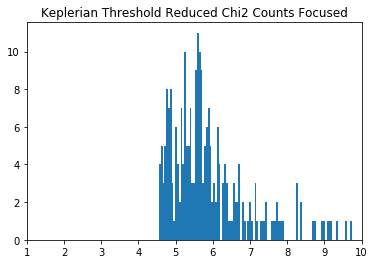

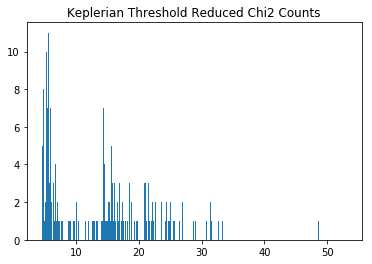

In [9]:
plt.figure(1)
plt.hist(values, bins=1000)
plt.title('Keplerian Threshold Reduced Chi2 Counts Focused')
plt.xlim(1, 10)
plt.figure(2)
plt.hist(values, bins=1000)
plt.title('Keplerian Threshold Reduced Chi2 Counts')

In [13]:
PositiveRotationValues=[]
NegativeRotationValues=[]
for i in range(len(Table)):
    if Table['RotationDirection'][i] == '1':
        PositiveRotationValues.append(Table['Threshold Reduced Chi2'][i])
    else:
        NegativeRotationValues.append(Table['Threshold Reduced Chi2'][i])

In [18]:
print(PositiveRotationValues)

[26.54, 14.631, 18.583, 7.431, 10.063, 12.567, 5.6364, 6.3286, 7.8729, 9.3412, 4.9996, 5.5753, 6.711, 7.6508, 4.7211, 5.1511, 6.0495, 6.7081, 4.6087, 4.9526, 5.6954, 6.1933, 4.6259, 4.8497, 5.4802, 5.9077, 4.7195, 4.8457, 5.3422, 5.7011, 4.806, 4.8999, 5.3353, 5.6573, 26.394, 13.935, 17.934, 7.2911, 9.5963, 11.875, 5.5561, 6.2778, 7.7094, 9.0761, 4.8689, 5.4202, 6.5868, 7.4141, 4.6707, 5.0261, 5.9253, 6.5867, 4.5755, 4.8572, 5.5923, 6.1159, 4.5812, 4.7822, 5.3846, 5.8177, 4.6327, 4.841, 5.2787, 5.6626, 4.8117, 4.8616, 5.2844, 5.5592, 26.353, 13.212, 17.232, 7.1661, 9.1874, 11.366, 5.3531, 6.14, 7.4534, 8.7611, 4.7936, 5.2671, 6.321, 7.1901, 4.6056, 4.925, 5.7269, 6.3702, 4.5534, 4.7629, 5.4494, 5.9562, 4.5797, 4.7365, 5.2766, 5.7162, 4.7204, 4.7643, 5.2301, 5.5525, 4.8301, 4.8383, 5.2542, 5.5216, 25.707, 12.131, 16.22, 7.0372, 8.7184, 10.719, 5.2489, 5.9088, 7.1544, 8.2522, 4.8499, 5.0854, 6.0346, 6.8435, 4.6338, 4.8219, 5.5631, 6.1709, 4.6828, 4.6547, 5.2814, 5.7694, 4.7706, 4.7237, 5

Text(0.5,1,'Keplerian Threshold Reduced Chi2 Counts, Rotation -1')

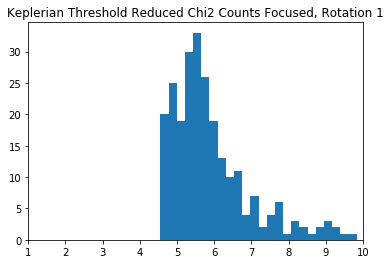

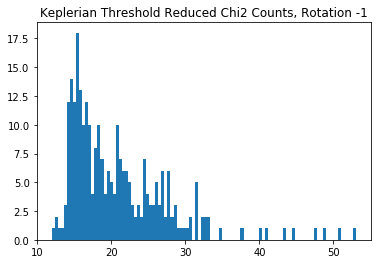

In [16]:
plt.figure(3)
plt.hist(PositiveRotationValues, bins=100)
plt.title('Keplerian Threshold Reduced Chi2 Counts Focused, Rotation 1')
plt.xlim(1, 10)
plt.figure(4)
plt.hist(NegativeRotationValues, bins=100)
plt.title('Keplerian Threshold Reduced Chi2 Counts, Rotation -1')

In [ ]:
X=[]
Y=[]
Z=[]
for i in range(len(Table)):
    print(Table['Rout'][i],
    Table['Rin'][i],
    Table['Threshold Reduced Chi2'][i])
    X.append(Table['Rout'][i])
    Y.append(Table['Rin'][i])
    Z.append(Table['Threshold Reduced Chi2'][i])

In [ ]:
print(len(X))

In [ ]:
Table.loc[Table['Mass'] == '1.5']

In [58]:
RoutValues=Table.loc[Table['Mass'] == '1.5']['Rout']
RinValues=Table.loc[Table['Mass'] == '1.5']['Rin']
ReducedChi2Values=Table.loc[Table['Mass'] == '1.5']['Threshold Reduced Chi2']

X=[]
Y=[]
Z=[]
for i in range(len(RoutValues)):
    print(Table['Rout'][i],
    Table['Rin'][i],
    Table['Threshold Reduced Chi2'][i])
    X.append(Table['Rout'][i])
    Y.append(Table['Rin'][i])
    Z.append(Table['Threshold Reduced Chi2'][i])
Xaxis, Yaxis = np.meshgrid(np.sort(np.unique(X)), np.unique(Y))

100 1 26.866
200 100 29.028
200 1 26.357
300 200 30.776
300 100 26.125
300 1 24.347
400 300 27.791
400 200 25.665
400 100 22.277
400 1 21.038
500 300 24.487
500 200 22.989
500 100 20.436
500 1 19.444
600 300 20.892
600 200 20.213
600 100 18.581
600 1 17.886
700 300 18.125
700 200 17.943
700 100 16.792
700 1 16.224
800 300 16.511
800 200 16.558
800 100 15.655
800 1 15.163
900 300 15.33
900 200 15.644
900 100 14.947
900 1 14.537
1000 300 14.363
1000 200 14.859
1000 100 14.339
1000 1 13.986
100 1 26.54
200 100 14.631
200 1 18.583
300 200 7.431
300 100 10.063
300 1 12.567
400 300 5.6364
400 200 6.3286
400 100 7.8729
400 1 9.3412
500 300 4.9996
500 200 5.5753
500 100 6.711
500 1 7.6508
600 300 4.7211
600 200 5.1511
600 100 6.0495
600 1 6.7081
700 300 4.6087
700 200 4.9526
700 100 5.6954
700 1 6.1933
800 300 4.6259
800 200 4.8497
800 100 5.4802
800 1 5.9077
900 300 4.7195
900 200 4.8457
900 100 5.3422
900 1 5.7011
1000 300 4.806
1000 200 4.8999
1000 100 5.3353
1000 1 5.6573


In [56]:
ZEmpty=np.full_like(Xaxis, np.nan, dtype=np.float64)
for xi, yi, zi in zip(Table['Rout'], Table['Rin'], Table['Threshold Reduced Chi2']):
#     print(type(int(xi)))
    tempx=np.where(int(xi) == np.asarray(np.unique(Xaxis), dtype='int'))[0][0]
    tempy=np.where(int(yi) == np.asarray(np.unique(Yaxis), dtype='int'))[0][0]
#     print(tempx, tempy)
    ZEmpty[tempy][tempx] = zi
print(ZEmpty)

[[16.039   5.9504  8.2538  6.6545  6.1478  6.0808  5.8914  5.8869  5.8198
   5.8545]
 [    nan  5.8043  6.5702  5.9338  5.7286  5.7765  5.6287  5.6228  5.5763
   5.6143]
 [    nan  5.9332     nan  6.715   6.9696  6.6367  6.3432  6.1307  6.0215
   5.9674]
 [    nan  6.4992     nan     nan  9.7404  8.9688  8.3414  7.5939  7.1437
   6.8045]]


In [57]:
Table['Rout']

0       100
1       200
2       200
3       300
4       300
5       300
6       400
7       400
8       400
9       400
10      500
11      500
12      500
13      500
14      600
15      600
16      600
17      600
18      700
19      700
20      700
21      700
22      800
23      800
24      800
25      800
26      900
27      900
28      900
29      900
30     1000
31     1000
32     1000
33     1000
34      100
35      200
36      200
37      300
38      300
39      300
40      400
41      400
42      400
43      400
44      500
45      500
46      500
47      500
48      600
49      600
50      600
51      600
52      700
53      700
54      700
55      700
56      800
57      800
58      800
59      800
60      900
61      900
62      900
63      900
64     1000
65     1000
66     1000
67     1000
68      100
69      200
70      200
71      300
72      300
73      300
74      400
75      400
76      400
77      400
78      500
79      500
80      500
81      500
82      600
83  

In [21]:
print(Xaxis)
print(Yaxis)
Z=[[26.54, 5.6573, 18.583, 12.567, 9.3412, 7.6508, 6.7081, 6.1933, 5.9077, 5.7011],
   [np.nan, 5.3353, 14.631, 10.063, 7.8729, 6.711, 6.0495, 5.6954, 5.4802, 5.3422],
  [np.nan, 4.8999, np.nan, 7.431, 6.3286, 5.5753, 5.1511, 4.9526, 4.8497, 4.8457],
  [np.nan, 4.806, np.nan, np.nan, 5.6364, 4.9996, 4.7211, 4.6087, 4.6259, 4.7195]]
print(np.shape(Z))

[['100' '1000' '200' '300' '400' '500' '600' '700' '800' '900']
 ['100' '1000' '200' '300' '400' '500' '600' '700' '800' '900']
 ['100' '1000' '200' '300' '400' '500' '600' '700' '800' '900']
 ['100' '1000' '200' '300' '400' '500' '600' '700' '800' '900']]
[['1' '1' '1' '1' '1' '1' '1' '1' '1' '1']
 ['100' '100' '100' '100' '100' '100' '100' '100' '100' '100']
 ['200' '200' '200' '200' '200' '200' '200' '200' '200' '200']
 ['300' '300' '300' '300' '300' '300' '300' '300' '300' '300']]
(4, 10)


In [37]:
np.shape(Z)

(4, 10)

Text(0.5,1,'Contour Plot of Chi2, Keplerian, Per-Emb-14, M=1.5')

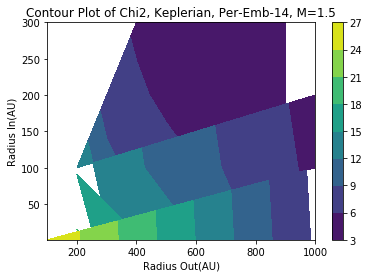

In [23]:
plt.contourf(Xaxis.tolist(), Yaxis.tolist(), Z)
plt.xlabel('Radius Out(AU)')
plt.ylabel('Radius In(AU)')
plt.colorbar()
plt.title('Contour Plot of Chi2, Keplerian, Per-Emb-14, M=1.5')

In [30]:
np.shape(ZEmpty)

(4, 10)

In [31]:
Xaxis

array([['100', '1000', '200', '300', '400', '500', '600', '700', '800',
        '900'],
       ['100', '1000', '200', '300', '400', '500', '600', '700', '800',
        '900'],
       ['100', '1000', '200', '300', '400', '500', '600', '700', '800',
        '900'],
       ['100', '1000', '200', '300', '400', '500', '600', '700', '800',
        '900']], dtype='<U4')

In [ ]:
[[0,0,0,1],[1,1,1,2]][0][3]

In [ ]:
#This requires the output file to be correctly formatted(18 lines per entry)
Cubename=[]
MassList=[]
RinList=[]
RoutList=[]
RcbList=[]
NormCList=[]
AllChi2List=[]
AllReducedChi2List=[]
ThresholdChi2List=[]
ThresholdReducedChi2List=[]

#Put complete filepath here
file=open('/Volumes/REU_2023/Per-emb-14_Models/KeplerianOnly/ModelsJune20/June20Keplerian.out')
filelist=file.readlines()

for i in range(int(len(filelist)/18)): #Main loop, gpes through output file in groups of 18 lines and collects the data
    
    tempname=filelist[i*18+3] #Starts with model cube
    HelpfulReference=tempname.find('/Per-emb-14-') #Just a nice index to start at the actual filename
    j=0
    
    Cubename_Start=tempname.find('Per-emb-14-Vsys7.63')
    Cubename.append(tempname[Cubename_Start:])#Grabs the main name of the cube
    Cubename[i]=Cubename[i][:-1] #Remove newline
    
    MassStart=tempname.find('M', HelpfulReference) #Find where the mass is in the filename
    MassList.append(tempname[MassStart+1:MassStart+4]) #And pull it out to store
    
    Rin_Start=tempname.find('Rin', HelpfulReference) #find Rin in filename
    while tempname[Rin_Start + 3 + j].isdigit() == True : #little loop to handle different digit length numbers, simply runs until the next chracter is not a digit
        j+=1 #And keeps track of how long it has searched
    RinList.append(tempname[Rin_Start +3:Rin_Start +3 + j])
    j=0
    
    Rout_Start=tempname.find('Rout', HelpfulReference) #find Rout in the filename
    while tempname[Rout_Start + 4 + j].isdigit() == True:
        j+=1
    RoutList.append(tempname[Rout_Start + 4:Rout_Start + 4 + j])
    j=0
    
    Rcb_Start=tempname.find('CB', HelpfulReference) 
    while tempname[Rcb_Start +2 + j].isdigit() == True:
        j+=1
    RcbList.append(tempname[Rcb_Start+2:Rcb_Start + 2 + j])
    j=0

    #Finished with cube filename stuff, now onto outputs
    
    NormCList.append(float(filelist[i*18+5][-12:]))
    AllChi2List.append(float(filelist[i*18+8][-12:]))
    AllReducedChi2List.append(float(filelist[i*18+9][-12:]))
    ThresholdChi2List.append(float(filelist[i*18+12][-12:]))
    ThresholdReducedChi2List.append(float(filelist[i*18+13][-12:]))

TableTemp=pd.DataFrame([Cubename, MassList, RinList, RoutList, RcbList, NormCList, AllChi2List, AllReducedChi2List, ThresholdChi2List, ThresholdReducedChi2List])
Table=TableTemp.T
Table.columns = ['Cube Name','Mass', 'Rin', 'Rout', 'CB', 'Normalization Constant', 'Chi2', 'Reduced Chi2', 'Threshold Chi2','Threshold Reduced Chi2']
pd.set_option('display.max_columns', 10000) #replace n with the number of columns you want to see completely
pd.set_option('display.max_rows', 10000)
Table_Keplerian = Table

#This requires the output file to be correctly formatted(18 lines per entry)
Cubename=[]
MassList=[]
RinList=[]
RoutList=[]
RcbList=[]
NormCList=[]
AllChi2List=[]
AllReducedChi2List=[]
ThresholdChi2List=[]
ThresholdReducedChi2List=[]

#Put complete filepath here
file=open('/Volumes/REU_2023/Per-emb-14_Models/IREOnly/ModelsJune21/IREJune21.out')
filelist=file.readlines()

for i in range(int(len(filelist)/18)): #Main loop, gpes through output file in groups of 18 lines and collects the data
    
    tempname=filelist[i*18+3] #Starts with model cube
    HelpfulReference=tempname.find('/Per-emb-14-') #Just a nice index to start at the actual filename
    j=0
    
    Cubename_Start=tempname.find('Per-emb-14-Vsys7.63')
    Cubename.append(tempname[Cubename_Start:])#Grabs the main name of the cube
    Cubename[i]=Cubename[i][:-1] #Remove newline
    
    MassStart=tempname.find('M', HelpfulReference) #Find where the mass is in the filename
    MassList.append(tempname[MassStart+1:MassStart+4]) #And pull it out to store
    
    Rin_Start=tempname.find('Rin', HelpfulReference) #find Rin in filename
    while tempname[Rin_Start + 3 + j].isdigit() == True : #little loop to handle different digit length numbers, simply runs until the next chracter is not a digit
        j+=1 #And keeps track of how long it has searched
    RinList.append(tempname[Rin_Start +3:Rin_Start +3 + j])
    j=0
    
    Rout_Start=tempname.find('Rout', HelpfulReference) #find Rout in the filename
    while tempname[Rout_Start + 4 + j].isdigit() == True:
        j+=1
    RoutList.append(tempname[Rout_Start + 4:Rout_Start + 4 + j])
    j=0
    
    Rcb_Start=tempname.find('CB', HelpfulReference) 
    while tempname[Rcb_Start +2 + j].isdigit() == True:
        j+=1
    RcbList.append(tempname[Rcb_Start+2:Rcb_Start + 2 + j])
    j=0

    #Finished with cube filename stuff, now onto outputs
    
    NormCList.append(float(filelist[i*18+5][-12:]))
    AllChi2List.append(float(filelist[i*18+8][-12:]))
    AllReducedChi2List.append(float(filelist[i*18+9][-12:]))
    ThresholdChi2List.append(float(filelist[i*18+12][-12:]))
    ThresholdReducedChi2List.append(float(filelist[i*18+13][-12:]))

TableTemp=pd.DataFrame([Cubename, MassList, RinList, RoutList, RcbList, NormCList, AllChi2List, AllReducedChi2List, ThresholdChi2List, ThresholdReducedChi2List])
Table=TableTemp.T
Table.columns = ['Cube Name','Mass', 'Rin', 'Rout', 'CB', 'Normalization Constant', 'Chi2', 'Reduced Chi2', 'Threshold Chi2','Threshold Reduced Chi2']
pd.set_option('display.max_columns', 10000) #replace n with the number of columns you want to see completely
pd.set_option('display.max_rows', 10000)
Table_IRE = Table 

#This requires the output file to be correctly formatted(18 lines per entry)
Cubename=[]
MassList=[]
RinList=[]
RoutList=[]
RcbList=[]
NormCList=[]
AllChi2List=[]
AllReducedChi2List=[]
ThresholdChi2List=[]
ThresholdReducedChi2List=[]

#Put complete filepath here
file=open('/Volumes/REU_2023/Per-emb-14_Models/IREAndKeplerian/IREAndKeplerianJune21.out')
filelist=file.readlines()

for i in range(int(len(filelist)/18)): #Main loop, gpes through output file in groups of 18 lines and collects the data
    
    tempname=filelist[i*18+3] #Starts with model cube
    HelpfulReference=tempname.find('/Per-emb-14-') #Just a nice index to start at the actual filename
    j=0
    
    Cubename_Start=tempname.find('Per-emb-14-Vsys7.')
    Cubename.append(tempname[Cubename_Start:])#Grabs the main name of the cube
    Cubename[i]=Cubename[i][:-1] #Remove newline
    
    MassStart=tempname.find('M', HelpfulReference) #Find where the mass is in the filename
    MassList.append(tempname[MassStart+1:MassStart+4]) #And pull it out to store
    
    Rin_Start=tempname.find('Rin', HelpfulReference) #find Rin in filename
    while tempname[Rin_Start + 3 + j].isdigit() == True : #little loop to handle different digit length numbers, simply runs until the next chracter is not a digit
        j+=1 #And keeps track of how long it has searched
    RinList.append(tempname[Rin_Start +3:Rin_Start +3 + j])
    j=0
    
    Rout_Start=tempname.find('Rout', HelpfulReference) #find Rout in the filename
    while tempname[Rout_Start + 4 + j].isdigit() == True:
        j+=1
    RoutList.append(tempname[Rout_Start + 4:Rout_Start + 4 + j])
    j=0
    
    Rcb_Start=tempname.find('CB', HelpfulReference) 
    while tempname[Rcb_Start +2 + j].isdigit() == True:
        j+=1
    RcbList.append(tempname[Rcb_Start+2:Rcb_Start + 2 + j])
    j=0

    #Finished with cube filename stuff, now onto outputs
    
    NormCList.append(float(filelist[i*18+5][-12:]))
    AllChi2List.append(float(filelist[i*18+8][-12:]))
    AllReducedChi2List.append(float(filelist[i*18+9][-12:]))
    ThresholdChi2List.append(float(filelist[i*18+12][-12:]))
    ThresholdReducedChi2List.append(float(filelist[i*18+13][-12:]))

TableTemp=pd.DataFrame([Cubename, MassList, RinList, RoutList, RcbList, NormCList, AllChi2List, AllReducedChi2List, ThresholdChi2List, ThresholdReducedChi2List])
Table=TableTemp.T
Table.columns = ['Cube Name','Mass', 'Rin', 'Rout', 'CB', 'Normalization Constant', 'Chi2', 'Reduced Chi2', 'Threshold Chi2','Threshold Reduced Chi2']
pd.set_option('display.max_columns', 10000) #replace n with the number of columns you want to see completely
pd.set_option('display.max_rows', 10000)
Table_IK = Table

In [ ]:
Table_IK

In [ ]:
BigTable=pd.concat([Table_Keplerian, Table_IRE, Table_IK])
BigTable=BigTable.reset_index()

In [ ]:
display(BigTable)

In [59]:
BigTable.to_csv('Per-Emb-14.csv')

Text(0.5, 1.0, 'IRE Threshold Reduced Chi2 Counts')

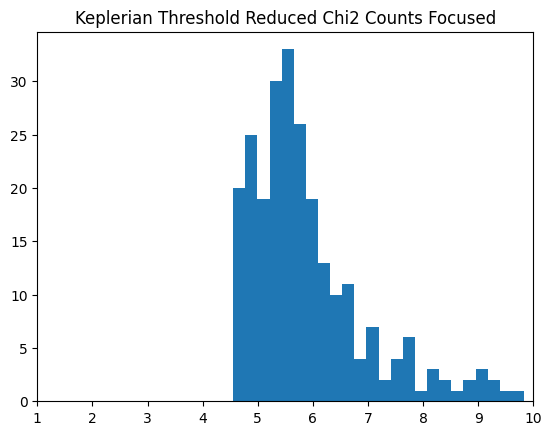

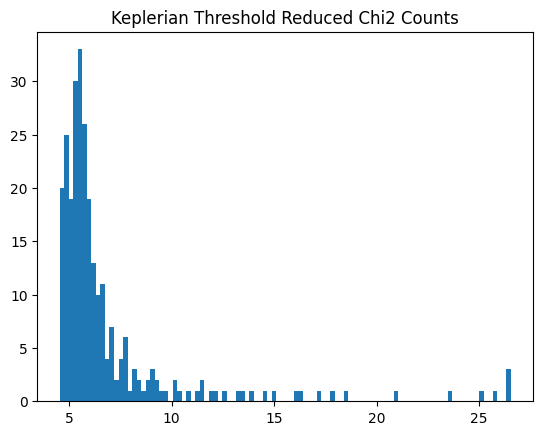

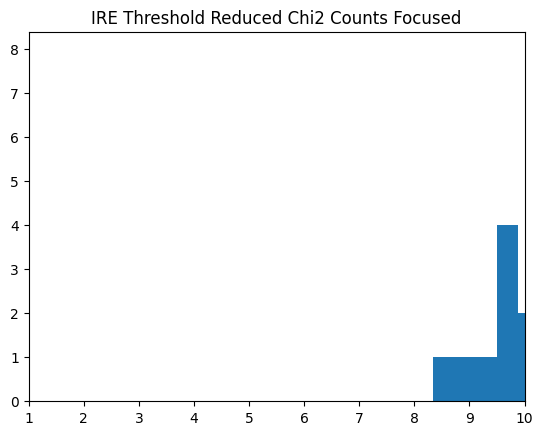

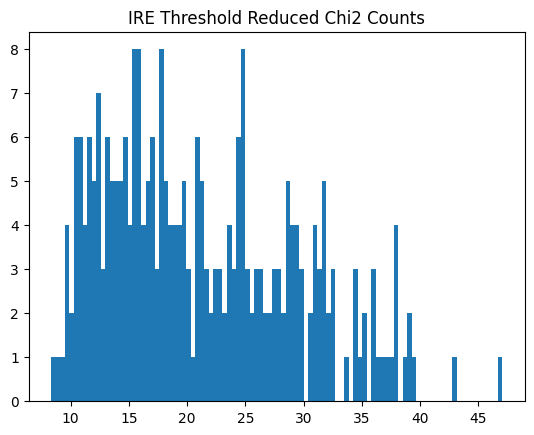

In [67]:
values=Table_Keplerian['Threshold Reduced Chi2']
plt.figure(1)
plt.hist(values, bins=100)
plt.title('Keplerian Threshold Reduced Chi2 Counts Focused')
plt.xlim(1, 10)
plt.figure(2)
plt.hist(values, bins=100)
plt.title('Keplerian Threshold Reduced Chi2 Counts')

values=Table_IRE['Threshold Reduced Chi2']
plt.figure(3)
plt.hist(values, bins=100)
plt.title('IRE Threshold Reduced Chi2 Counts Focused')
plt.xlim(1, 10)
plt.figure(4)
plt.hist(values, bins=100)
plt.title('IRE Threshold Reduced Chi2 Counts')